In [ ]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

## Quantitative Risk Assessment Techniques


This case models a company's concern about the risk of a competitor entering its market. 

To quantify this risk, we use a combination of expert opinion and historical data. 
- Expert assessments are collected using the Delphi method, which yields a prior belief of approximately 30% chance of competitor entry, modeled using a Beta(3, 7) distribution to reflect moderate confidence.
    - The mean of Beta distribution is $$(\alpha + \beta) / \alpha$$
- Historical data shows that in 5 out of 12 similar market situations, competitors successfully entered. Using Bayesian inference, we update our beliefs by combining this data with our prior.
- The result is a posterior distribution representing the updated probability of competitor entry.
- We visualize this using a density plot and note that the model is flexible—allowing us to adjust the prior based on new scenarios or assumptions, such as economic shocks or regulatory changes.

In [2]:
# Step 1: Prior beliefs from Delphi Method (e.g., 3 experts)
# Expert consensus: ~30% chance of competitor entry, moderate confidence
alpha_prior = 3
beta_prior = 7  # Beta(3,7) has a mean of 0.3

In [3]:
# Step 2: Historical data (e.g., 5 out of 12 similar cases had entries)
historical_entries = 5
historical_total = 12

#### obs = pm.Binomial('obs', n=historical_total, p=theta, observed=historical_entries)

- Defines the likelihood function for the observed data.
- Uses a Binomial distribution (appropriate for count data where you have successes out of trials).
- n=historical_total: Total number of trials.
- p=theta: Probability of success (our parameter we're estimating).
- observed=historical_entries: The actual observed success count (data).

#### trace = pm.sample(2000, tune=1000, cores=1, return_inferencedata=True)

- Runs the MCMC (Markov Chain Monte Carlo) sampling to approximate the posterior distribution.
- 2000: Draws 2000 samples from the posterior.
- tune=1000: Uses 1000 tuning steps to adjust sampling parameters (discarded).
- cores=1: Uses 1 CPU core.
- return_inferencedata=True: Returns results in ArviZ's InferenceData format (for better diagnostics).

In [4]:
# Step 3: Define Bayesian model
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=alpha_prior, beta=beta_prior) #Defines a prior distribution for the parameter theta (which represents a probability). Beta distribution is a common choice for probabilities.
    obs = pm.Binomial('obs', n=historical_total, p=theta, observed=historical_entries)
    trace = pm.sample(2000, tune=1000, cores=1, return_inferencedata=True)

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


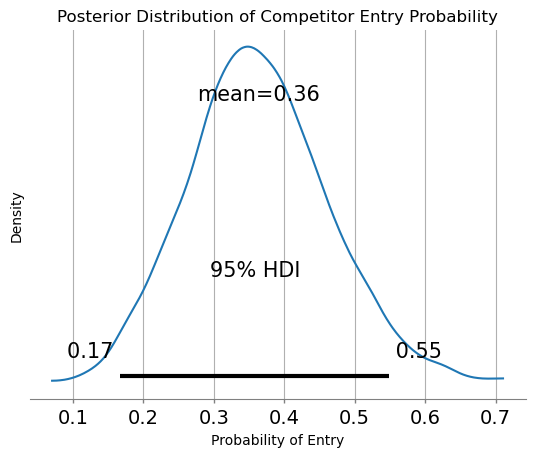

In [5]:
# Step 4: Plot posterior distribution
az.plot_posterior(trace, var_names=["theta"], hdi_prob=0.95)
plt.title("Posterior Distribution of Competitor Entry Probability")
plt.xlabel("Probability of Entry")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In [ ]:
# Step 5: Simulate impact of new scenario (e.g., a market shock reduces chances)
# Adjust prior to Beta(2, 8) and rerun if needed

#### Interpretation of the graph and conclusion.

- The posterior distribution is the updated belief about the competitor's entry probability after combining prior beliefs (expert opinions) with observed data.
- Mean (0.36):
    - The average posterior probability of competitor entry is 36%.
    - This is the Bayesian "best estimate" after updating prior beliefs with data.
- 95% HDI (Highest Density Interval):
    - The shaded region spans 0.17 to 0.55.
    - Interpretation: "There’s a 95% probability the true entry probability lies between 17% and 55%."